<h1 align="center">MSIN0097: Predictive Analytics</h1>
<h1 align="center">Individual Coursework</h1>
<h1 align="center">Airlines Customer Satisfaction</h1>
<h2 align="center">Predict Satisfaction Level</h2>

![Airline](https://user-images.githubusercontent.com/73695418/110212008-3802d700-7e91-11eb-840c-63fe1eaf89e2.jpg)
<br><br><br>
<h3 align="center">Word Count : 2078  </h3>
<h3 align="center"> (Excluding Table of Contents and References)</h3>
<h3 align="center">March 2021</h3>


## Table of Contents
* [1. Problem Framing](#1.-Problem-Framing)
* [2. Data Cleaning and Transformation](#2.-Data-Cleaning-and-Transformation)
* [3. Data Exploratory Analysis and Visualisation](#3.-Data-Exploratory-Analysis-and-Visualisation)
* [4. Data Preparation](#4.-Data-Preparation)
    * [4.1 Train-test split](#4.1-Train-test-split)
    * [4.2 Encoding Dependent Variable](#4.2-Encoding-Dependent-Variable)
    * [4.3 Full Pipeline](#4.3-Full-Pipeline)
    * [4.4 PCA](#4.4-PCA)
* [5. Predictive Machine Learning (ML) Models ](#5.-Predictive-Machine-Learning-(ML)-Models)
    * [5.1  Logistic Regression](#5.1--Logistic-Regression)
    * [5.2  Support Vector Machine (SVM) Classifier](#5.2--Support-Vector-Machine-(SVM)-Classifier)
    * [5.3 Ridge Classifier](#5.3-Ridge-Classifier)
    * [5.4 DecisionTree Classifier ](#5.4-DecisionTree-Classifier)
    * [5.5 Random Forest Classifier ](#5.5-Random-Forest-Classifier)
    * [5.6 Gradient Boosting Classifier ](#5.6-Gradient-Boosting-Classifier)
    * [5.7 K-nearest Neighbors Classifier](#5.7-K-nearest-Neighbors-Classifier)
    * [5.8 Shortlisted Models](#5.8-Shortlisted-Models)
* [6. Fine Tuning ](#6.-Fine-Tuning)   
    * [6.1 Random Search](#6.1-Random-Search)
    * [6.2 Ensemble Method: Voting Classifier](#6.2-Ensemble-Method:-Voting-Classifier)
    * [6.3 Another Ensemble: Adaboost ](#6.3-Another-Ensemble:-Adaboost)
    * [6.4 Final Model](#6.4-Final-Model)
    
* [7. Conclusion ](#7.-Conclusion)
* [8. Reccomendations](#8.-Reccomendations)
* [9. Limitations and Future Work ](#9.-Limitations-and-Future-Work)
* [10. References](#10.-References)

# 1. Problem Framing 

Airlines industry is a fast-growing and customers' focused one. The sector has been facing dynamic changes due to *technological disruptions* which have shifted customers' preferences. This is in addition to the *pandemic* that has reduced international travel and added pressure on organizations to align with travel restrictions and accommodate individuals' safety. Infact, nowadays airlines' customers increasingly want **enjoyable and safe experience** that gives them diverse yet personalized offerings (PWC, 2021).


This project takes a Kaggle dataset of a survey conducted on more than 100k customers of an airlines company and which assesses feedback on travel attributes such as booking, arrival, checkin, and onboarding services, etc. 

The *project* aims to:


1- **explore and visualize** *customers' responses*,


2- **build** *machine learning models* that predict the satisfaction level of customers; the best model will be chosen based on high F-1 score and low Generalization error 


3- **identify** the *features* that customers perceive as most important ones to feel satisfied so Airlines can improve these features to boost satisfaction level


4- **reccomend** *innovative data-driven strategies* which can implemented to turn unsatisfied customers to satisfied ones

The main assumption is that satisfaction will lock-in and retain customers. This will encourage them to book again with the same Airlines and consequently revenues will be increased.

![CONVERT](https://user-images.githubusercontent.com/73695418/110217794-f896b380-7ead-11eb-9941-1fc49bd943db.jpg)

In [17]:
#import needed packages 
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image
from IPython.core.display import HTML 

# 2. Data Cleaning and Transformation

This section includes basic data wrangling. The dataset doesn't require much needed cleaning. However, variables such as Customer Type, Class, Satisfaction, Gender, and Travel Type will be converted into categorical type. Unncessary columns will be dropped and missing values will be detected. 

Two new variables will be created which will help in comprehensive data analysis:

1- over_all rating which will take the average of all numeric variables taken as a score of 5 from customers' feedback

2- total_delay which will sum up the arrival and departure delay 

In [2]:
#Load the data
def load_data(data_path,filename):
    data_path = os.path.join(data_path, filename)
    return pd.read_csv(data_path)
Airlines = load_data('/project/',"Airlines.csv")
#inspect the data 
Airlines.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
#get the data info
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
Airlines.shape #check the shape of the dataframe
#103904 datapoints and 25 columns 

(103904, 25)

In [5]:
Airlines.isna() #check for missing values 
#no missing data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
Airlines.duplicated() #check for duplicated values
#no duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
103899    False
103900    False
103901    False
103902    False
103903    False
Length: 103904, dtype: bool

In [7]:
#basic data transfromation
#change the variable type of gender, customer type, type of travel, class, &
#satsifaction into categorical
Airlines['Gender'] = Airlines['Gender'].astype('category')
Airlines['Type of Travel'] = Airlines['Type of Travel'].astype('category')
Airlines['Customer Type'] = Airlines['Customer Type'].astype('category')
Airlines['Class'] = Airlines['Class'].astype('category')
Airlines['satisfaction'] = Airlines['satisfaction'].astype('category')
#drop the unnamed column 
Airlines.drop("Unnamed: 0", axis =1, inplace= True)
#check again 
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 103904 non-null  int64   
 1   Gender                             103904 non-null  category
 2   Customer Type                      103904 non-null  category
 3   Age                                103904 non-null  int64   
 4   Type of Travel                     103904 non-null  category
 5   Class                              103904 non-null  category
 6   Flight Distance                    103904 non-null  int64   
 7   Inflight wifi service              103904 non-null  int64   
 8   Departure/Arrival time convenient  103904 non-null  int64   
 9   Ease of Online booking             103904 non-null  int64   
 10  Gate location                      103904 non-null  int64   
 11  Food and drink            

In [18]:
#create a new variable : over_all rating which is the average of all rated variables by customers
Airlines['overall_rating'] = round((Airlines['Inflight wifi service']+ Airlines['Departure/Arrival time convenient'] +
Airlines['Ease of Online booking'] + Airlines['Gate location'] + Airlines['Food and drink']+ Airlines['Online boarding'] + 
Airlines['Seat comfort'] + Airlines['Inflight entertainment'] + Airlines['On-board service'] + Airlines['Leg room service'] + 
Airlines['Baggage handling'] + Airlines['Checkin service'] + Airlines['Inflight service'] + Airlines['Cleanliness'])/14,1)
#create a new variable: Total Delay which is the sum of departure and arrival delay times
Airlines['Total_Delay'] = (Airlines['Departure Delay in Minutes']+ 
                                    Airlines['Arrival Delay in Minutes'])
#inspect the dataframe again to see the new two columns 
Airlines.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,overall_rating,Total_Delay
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,3,4,4,5,5,25,18.0,dissatisfied,3.9,43.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,5,3,1,4,1,1,6.0,dissatisfied,2.3,7.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,3.7,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,5,3,1,4,2,11,9.0,dissatisfied,3.0,20.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,3.5,0.0


# 3. Data Exploratory Analysis and Visualisation 

It is critical to explore the dataset and conduct data visualisations to pinpoint trends, correlations, and relationships between variables. 

We will study the below: 

1- Data distributions of variables through histograms and summary statistics


2- Data correlations among variables and by class through heatmaps 


3- Relationship between satisfaction and gender, class, and customer type through bar graphs and count plots 


4- Relationship between overall rating, satisfaction, and class through categorical plot 


5- Relationship between satisfaction and age through stacked plot

In [9]:
#Summary Statistics of numeric variables 
#create a list of numeric variables 
numeric_variables = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient','Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'overall_rating', 'Total_Delay' ]
#apply the describe method and lambda function to round each number 
Airlines[numeric_variables].describe().apply(lambda x:round(x,2)).T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.38,15.11,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.45,997.15,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.73,1.33,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.06,1.53,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.76,1.40,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.98,1.28,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.20,1.33,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.25,1.35,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.44,1.32,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.36,1.33,0.0,2.0,4.0,4.0,5.0


Satisfaction is affected by wifi and inflight service and older people constitute a big customer's base. The statistics show that wifi has the lowest average rating, inflight sercvce has the highest one, and the average age of customers is 40-years-old.

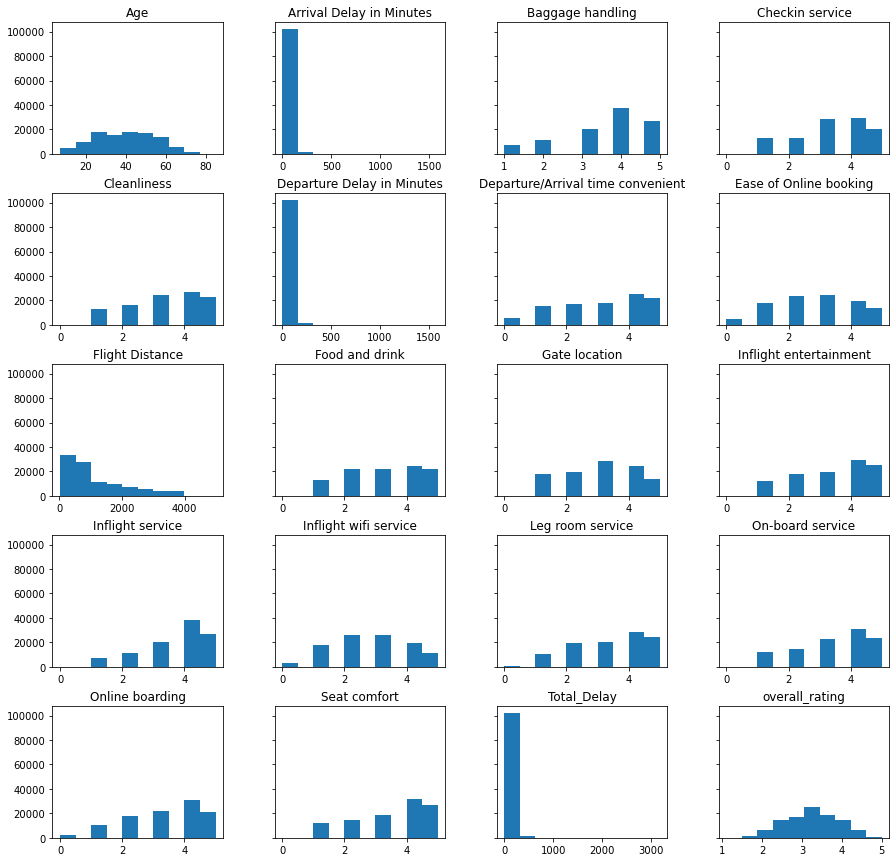

In [10]:
#create histograms for data distribution of numeric variables 
hist = Airlines[numeric_variables].hist(bins =10, xlabelsize=10, ylabelsize=10, grid=False, sharey= True, figsize = (15,15))

Types of distribution: Age and over_all rating have bell-shaped(normal pattern) whereas flight distance, departure, and arrival delays follow a right skewed one. Remaining variables have sort of unitary distribution.

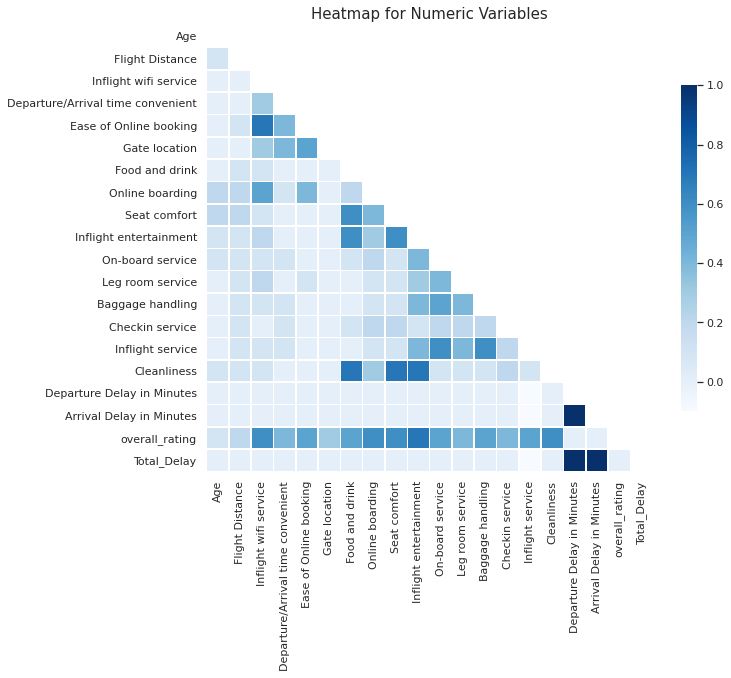

In [11]:
#create a correlation heatmap for the numeric variables 
sns.set(style='white') #set the style
corr = round(Airlines[numeric_variables].corr(),1) #define the correlation 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,12)) #figure size 
cmap = sns.diverging_palette(10,150, as_cmap=True) #figure colour 
ax = sns.heatmap(corr, mask =mask, cmap="Blues", vmax= 1, annot = False, 
annot_kws= {'size':12}, square=True, xticklabels=True, yticklabels=True, 
linewidths=.6, linecolor='w', cbar_kws={'shrink': 0.5}, ax=ax) #input the ax varibales 
ax.set_title('Heatmap for Numeric Variables', fontsize=15); #set the figure title  

Overall rating is highly correlated with wifi service, online booking, boarding, seat comfort, and entertaiment. Additionally, other variables are still strongly correlated with each other (>0.3). So, we will consider using PCA to reduce dimensionality before building the models

In [65]:
#Visualisize the correlations through a bar graph to identify the improtant features 
corr1=corr.iloc[[-2]].T.sort_values(by="overall_rating").drop(index=["overall_rating"]).reset_index() #take the correlation heatmap, sort by overall rating and reindex it 
corr2 = corr1.rename({'index': 'feature', 'overall_rating': 'correlation'}, axis=1)  # rename the columns
fig = px.bar(corr2, y='feature', x='correlation',orientation="h",height=500, color ='correlation', title="Important Features Affecting Customers Satisfation");
#fig.show();
#save the figure and display it because it is an interactive one 
Image(url= "https://user-images.githubusercontent.com/73695418/110239611-c9308700-7f3f-11eb-938e-13596a2ad733.PNG")

This graph further demonstrates that entertaiment, wifi, cleanliness, seat-comfort and online-boarding are the 
most important features for customer to provide high rating and feel satisfied.

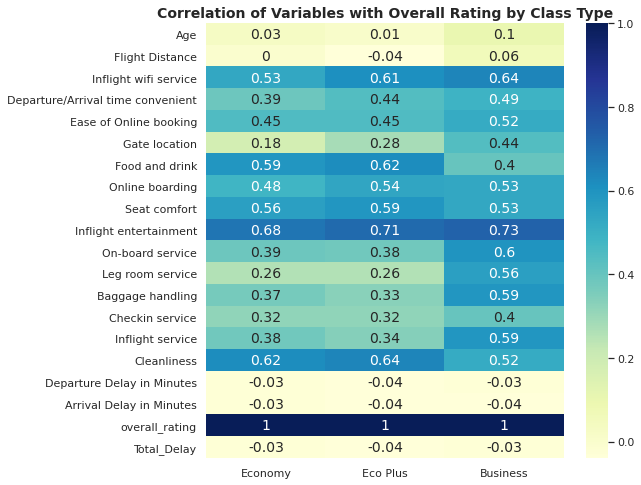

In [136]:
#Study the correlaion of overall_rating by class type: eco, ecoplus, and business
#create 3 separate dataframes for each class type 
economy_df = Airlines[Airlines['Class'] == "Eco"]
ecoplus_df = Airlines[Airlines['Class']== "Eco Plus"]
business_df = Airlines[Airlines['Class'] == "Business"]
#find the correlation matrix for each dataframe seperately 
economy_df_corr = economy_df.corr()['overall_rating']
ecoplus_df_corr = ecoplus_df .corr()['overall_rating']
business_df_corr = business_df.corr()['overall_rating'] 

class_corr_df = pd.concat([economy_df_corr, ecoplus_df_corr, business_df_corr], axis=1, keys = ['Economy', 'Eco Plus', 'Business']) #concateate the three correlations        
np.round(class_corr_df[1:], decimals=2) #apply the round function 
f, ax = plt.subplots(figsize=(8, 8)) #set the figure size 
heatmap = sns.heatmap(np.round(class_corr_df[1:], decimals=2), annot=True, 
cmap="YlGnBu", xticklabels=True, yticklabels=True, annot_kws= {'size':14}, ax=ax) #define the heatmap variables 
heatmap.set_title('Correlation of Variables with Overall Rating by Class Type', fontweight="bold", fontsize=14); #set the title 

Inflight Entertainment follOwed by wifi and cleanliness are the highest correlated variables with overall rating for the three classes. Business class cares more about on-board, leg-room, check-in and baggage handling. 

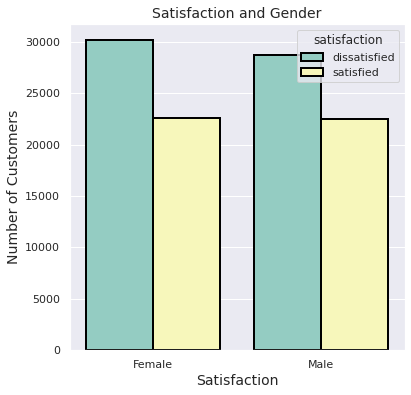

In [40]:
#graph about satisfactiion and gender
plt.figure(figsize = (6,6))
sns.set(rc= {"font.size":14, "axes.titlesize":14, "axes.labelsize":14})
g = sns.countplot(x= 'Gender' , hue ='satisfaction', palette="Set3", saturation=0.8, edgecolor=(0,0,0),linewidth=2, data=Airlines)#figure variables
g.set_title('Satisfaction and Gender') #set title
g.set_ylabel('Number of Customers') #y_label
g.set_xlabel('Satisfaction'); #x_label

Overall, the number of dissatisfied customers is higher than the satisfied ones and specifically females are more dissatisifed than males.

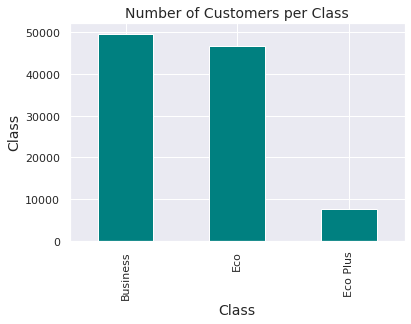

In [46]:
#Number of Customers per Class Category 
plt.figure(figsize=(6,4)) #figure size 
ax=Airlines.groupby('Class')['id'].count().sort_values(ascending =False).plot(kind='bar',color = 'teal') #figure variables 
plt.ylabel('Class', fontsize = 14) #set y_label
plt.title('Number of Customers per Class', fontsize = 14); #set the figure title 

Business class captures the highest category of customers which shows that the service is mostly preferred by business customers

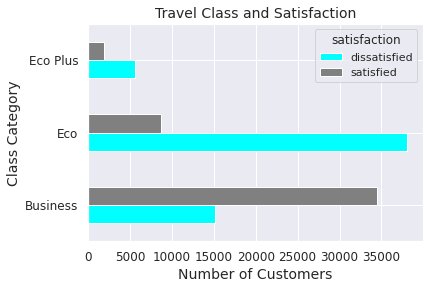

In [44]:
#Satisfaction and Class Category 
by_cat_class = Airlines.groupby(['Class', 'satisfaction']) #group by Class and Category 
by_cat_class.size() #get the size of the dataframe 
ax = by_cat_class.size().unstack().plot(kind='barh', color = ['aqua', 'grey']) #unstack and plot 
ax.set_title('Travel Class and Satisfaction', size =14) #title 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Number of Customers', fontsize = 14) #set the x_label 
ax.set_ylabel('Class Category', fontsize = 14); #set the y_label 

Business customers are the most satisifed whereas eco-customers are the least satisfied. Most importantly, 80% of the total eco customers are dissatisfied. This indicates that the service is not delivered to match the preferences of different classes and a higher care was only given to business class

<Figure size 432x576 with 0 Axes>

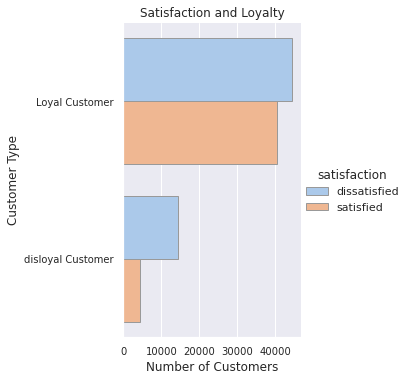

In [63]:
#Customer Satisfaction and Loyalty 
plt.figure(figsize = (6,8)) #figure size
ax = sns.catplot(y="Customer Type", hue="satisfaction", kind="count",
            palette="pastel", edgecolor=".6",
            data=Airlines) #figure variables
sns.set(rc= {"font.size":12, "axes.titlesize":12, "axes.labelsize":12})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Customer Type')
plt.xlabel('Number of Customers')
plt.title('Satisfaction and Loyalty');

Loyal customers tend to be dissatisfied which increases the risk of losing them 

<Figure size 576x432 with 0 Axes>

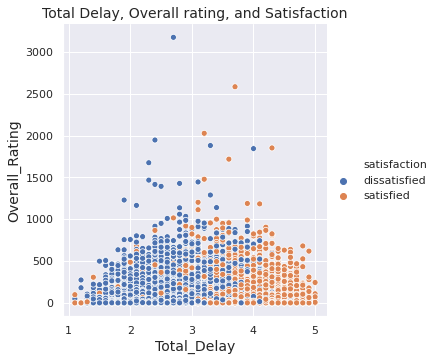

In [68]:
#Total Delay, over all rating and satisfaction 
plt.figure(figsize = (8,6)) #figure size 
sns.set(rc= {"font.size":14, "axes.titlesize":14, "axes.labelsize":14}) 
m = sns.relplot(x="overall_rating", y="Total_Delay",hue ='satisfaction',
            data=Airlines); #define variables 
plt.title('Total Delay, Overall rating, and Satisfaction') #set title 
plt.xlabel('Total_Delay') #x_label
plt.ylabel('Overall_Rating'); #set y_label

Total Delay affects satisfaction whereby the lower delay time leads to a higher rating average and a satisfied customer

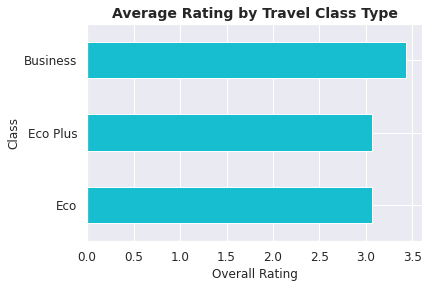

In [69]:
#Average Rating per Class Category 
fig, ax = plt.subplots(figsize=(6,4)) #figure size
average_rating = Airlines.groupby(['Class']).mean()['overall_rating'].sort_values(ascending =True)
average_rating.plot(ax=ax, kind='barh', color ='tab:cyan') #plot the graph
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('Average Rating by Travel Class Type', fontweight="bold", size =14) #set the title
ax.set_xlabel('Overall Rating', fontsize = 12)
ax.set_ylabel('Class', fontsize = 12);

Business Class provided higher rating average which affirms that they are genuily satisfied with the service

<Figure size 2160x720 with 0 Axes>

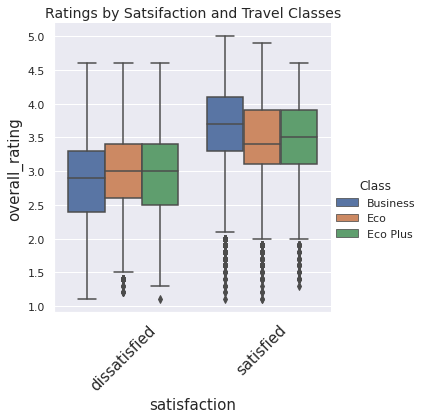

In [20]:
#Distribution of rating by Class Type and Satisfaction Level 
plt.figure(figsize = (30,10)) #figure size
sns.set(rc= {"font.size":15, "axes.titlesize":15, "axes.labelsize":15 })
g= sns.catplot(x="satisfaction", y="overall_rating",  hue="Class", kind="box", data=Airlines) #define variables 
g.set_xticklabels(rotation = 45, fontsize = 15) #x_tick labels 
plt.title('Ratings by Satsifaction and Travel Classes', size =14); #set title 

As shown before, satisifed and specifically business customers give higher rating. However, this graph displays some outliers with very low ratings; this will be treated through standardization in the data preparation part.


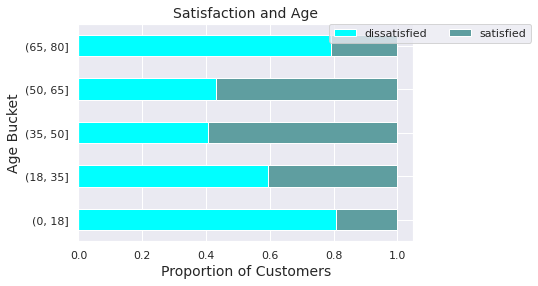

In [23]:
#Discretize the overall_ratings into buckets 
overall = Airlines['Age']
labels = pd.cut(overall, [0, 18, 35, 50, 65 , 80])
grouped = Airlines.groupby(['satisfaction', labels]) #group it by satisfaction level
grouped.size().unstack(0) #unstack
#sum group amounts 
bucket_sums = grouped.overall_rating.sum().unstack(0)
#normalize within buckets to visualize total ratings within each bucket by Satisfaction category 
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0) 
#plot the discretized ratings buckets and satisfaction 
plot = normed_sums.plot(kind='barh', stacked=True, color= ['aqua','cadetblue'] )
plot.legend(loc="upper center",ncol=2,borderaxespad=0.,bbox_to_anchor=(1.05, 1))
plot.set_title('Satisfaction and Age', size =14) 
plot.set_xlabel('Proportion of Customers', fontsize = 14)
plot.set_ylabel('Age Bucket', fontsize =14);


Customers of age less than 18 and more than 65 are the least satisfied. The Airlines should consider implementing personalized services tailored for adults and old customers. 

The **key takeaways** from the Visualisation part are that:

1- Satisfaction is stronlgy dependent on customers' experience on inflight entertainment, wifi service and cleanliness. Business class particularly cares about on-board, leg room, check-in services and baggage handling. 
 
2- The Airlines are providing better consideration for business class while ignroing the interests of eco customers

3- Total delay is lowering overall rating and affecting satisfaction negatively

4- Age is a major criterion of customer's satisfaction. Adults and old people are not satisfied 


# 4. Data Preparation 

This section prepares the data for the machine learning models. Firstly, dataset will be splitted to train and test with a ratio of 80/20 respectively and the dependent variable: "satisfaction level" will be dropped out from the dataset
and encoded as {0: 'unsatisfied', 1: 'satisfied'}. Then, a full pipeline will be built to impute and standarize the data and encode the categorical variables. To reduce dimensionality and number of features, PCA will be applied. 

## 4.1 Train-test split

In [24]:
Airlines_1 = Airlines.copy() #make a copy of the data 
train_set, test_set = train_test_split(Airlines_1, test_size=0.2, random_state=42) #split the training (0.8) and test (0.2)
test_set.head() #inspect the test data 

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,overall_rating,Total_Delay
80638,98687,Female,Loyal Customer,26,Personal Travel,Eco,861,2,4,2,...,4,4,3,5,5,0,0.0,dissatisfied,4.0,0.0
43398,80734,Male,Loyal Customer,22,Business travel,Business,393,3,5,5,...,1,3,2,3,3,0,16.0,dissatisfied,3.1,16.0
32751,5711,Female,Loyal Customer,59,Personal Travel,Eco,196,1,3,1,...,1,4,3,4,4,37,34.0,dissatisfied,2.9,71.0
33571,23035,Female,Loyal Customer,32,Personal Travel,Eco,1020,2,3,2,...,2,4,1,4,4,27,4.0,dissatisfied,3.1,31.0
71287,53962,Male,disloyal Customer,35,Business travel,Business,1117,2,2,2,...,2,3,2,2,2,0,0.0,dissatisfied,2.2,0.0


In [25]:
#drop the dependent variable from the train_set and keep it as separate predicted variable
x_train_set = train_set.drop("satisfaction", axis=1) #train set of independent variables
y_train_set = train_set['satisfaction'] #train dependent variable 
x_test_set = test_set.drop("satisfaction", axis=1) #test set of independent variables
y_test_set = test_set['satisfaction'] #test dependent variable 

In [26]:
#define numeric and categorical variables 
numeric_variables = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service','Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'overall_rating', 'Total_Delay' ]
categorical_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

## 4.2 Encoding Dependent Variable

In [27]:
#encode the dependent variable: satisfaction 
labelencoder_y = LabelEncoder()
train_y = labelencoder_y.fit_transform(y_train_set)
print(train_y)

[0 0 0 ... 0 1 0]


## 4.3 Full Pipeline

In [28]:
#build a pipeline for numeric and categorical data 
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),]) #numeric pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numeric_variables  ),
        ("cat", OneHotEncoder(),categorical_variables),]) #full pipeline 
x_train = full_pipeline.fit_transform(x_train_set) #apply the pipeline on the x_train set 
x_train #print out

array([[ 1.29986657, -0.14310337,  0.95637727, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.04355119, -0.43800734,  0.95637727, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.69659774, -0.80814191, -0.54993143, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.44028236,  0.00836091, -1.30308577, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15481439, -0.87133562,  1.70953161, ...,  0.        ,
         1.        ,  0.        ],
       [-1.67561721, -0.8402403 ,  0.95637727, ...,  0.        ,
         1.        ,  0.        ]])

In [29]:
#Apply data pipeline transformation on test_set 
test_y = labelencoder_y.fit_transform(y_test_set) #to encode the dependent variable (0,1)
x_test = full_pipeline.fit_transform(x_test_set ) #to apply full pipeline on test set
x_test #inspect

array([[-0.89747814, -0.33225846, -0.54794265, ...,  0.        ,
         1.        ,  0.        ],
       [-1.16274657, -0.80121183,  0.20500295, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.29098646, -0.99861314, -1.30088825, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.02486899, -0.18796511, -0.54794265, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36254693,  2.04557563,  0.20500295, ...,  1.        ,
         0.        ,  0.        ],
       [-0.56589259, -1.10883723,  0.95794855, ...,  0.        ,
         0.        ,  1.        ]])

## 4.4 PCA

In [30]:
#Apply the Principal Component Analysis to reduce dimensionality and number of features 
pca = PCA(.95) #preserve the variance with 95%
pca.fit(x_train)
pca.n_components_
#number of variables have been reduced to 17

PCA(n_components=0.95)

17

In [31]:
1 - pca.explained_variance_ratio_.sum()
#only 0.04 of the dimensionality was lost 

0.041950205952189346

In [32]:
x_train_prepared = pca.transform(x_train) #apply the PCA on x_train 
x_train_prepared 

array([[-0.8430599 , -0.19623251, -0.63466933, ...,  0.52269979,
         0.23432315, -0.84742384],
       [ 0.59735158,  0.35045008, -1.53814263, ..., -0.73766013,
         1.07875365, -1.87207963],
       [ 1.96572496, -0.9482699 ,  0.06138406, ...,  0.13199832,
         0.03029589, -0.11574157],
       ...,
       [ 5.08143228, 10.72571097,  1.00139477, ...,  0.96278747,
         0.53520084,  0.22644674],
       [-2.22157323, -0.32127893, -2.26179652, ...,  0.27396799,
        -0.05748409,  0.19271732],
       [-2.05663065, -0.47235299, -0.76711359, ...,  0.4197045 ,
        -0.07095604, -0.11693612]])

In [33]:
pca.fit(x_test)
x_test_prepared = pca.transform(x_test) #apply the PCA on x_test
x_test_prepared

PCA(n_components=0.95)

array([[-2.2620847 , -0.58142659,  0.69285241, ..., -0.31985685,
        -0.49919723, -0.21334744],
       [ 1.07709261, -0.24786412, -2.67526151, ..., -0.38392716,
         0.05561265,  0.20007516],
       [ 1.16547757,  0.79448064,  1.16355854, ...,  0.10243261,
         0.1366903 ,  0.94597313],
       ...,
       [-1.38534877, -0.62041762,  0.93678142, ..., -1.56860761,
         0.0191605 , -0.23034488],
       [-2.24201044, -0.12744834,  0.45243588, ..., -0.05836203,
        -0.79859469, -0.91206511],
       [ 0.68788963, -0.80333664,  1.56116995, ...,  0.53517332,
         0.0222838 ,  0.02896342]])

# 5. Predictive Machine Learning (ML) Models 

To predict the satisfaction level, we will try 7 ML models. Each model will be fitted on the trainset and the performance will be evaluated through investigating the confusion matrix, classification report, and cross-validation scores. In particular, the F-1 score which combines the precision and recall will be used as a *primary measure* of the model's performance. From a business perspective, the F-1 score will allow us to reduce the mis-classification error, or classifying dissatisfied customer as satisfied one and vise-versa. This will also minimize the risk of implementing wrong interventions for customers with incorrect category. 

## 5.1  Logistic Regression

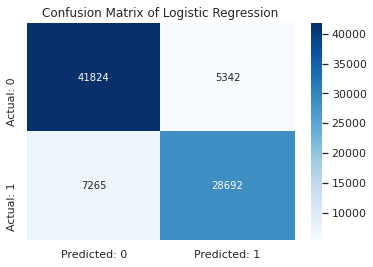

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87     47166
           1       0.84      0.80      0.82     35957

    accuracy                           0.85     83123
   macro avg       0.85      0.84      0.84     83123
weighted avg       0.85      0.85      0.85     83123

Cross Validation Scores are:  [0.81994697 0.81720615 0.82132899]
Average F1 score of Logistic Regression from Cross Validation is:  0.82


In [195]:
logmodel = LogisticRegression() #initiate the model
logmodel.fit(x_train_prepared , train_y ) #fit the model 
y_predict_1 = logmodel.predict(x_train_prepared) #predict
confusion_1 = confusion_matrix(train_y, y_predict_1) #create the confusion matrix
confusion_1 = pd.DataFrame(data=confusion_1, columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0 ','Actual: 1']) #transform it to dataframe
ax = plt.axes()
ax.set_title('Confusion Matrix of Logistic Regression')
sns.heatmap(confusion_1, annot=True, fmt ='d', cmap="Blues", linecolor='w') #plot confusion matrix as heatmap
plt.show()
print('Classification report: \n', classification_report(train_y ,y_predict_1)) #classification report 
scores_1 = cross_val_score(logmodel, x_train_prepared,  train_y, cv=3, scoring="f1") #cross validation scores 
print('Cross Validation Scores are: ', scores_1)
print("Average F1 score of Logistic Regression from Cross Validation is:  %0.2f" % (scores_1.mean()));

The logistic regression estimates the probability of customer belongs to either satisfied or unsatisfied class. The results present a F1-score of 82%. However, this model fails to account for non-linearity relationship between the dependent and independent variables. Additionally, since our dataset is still high dimensional, the model might over-fit on the training set, which overstates the accuracy of predictions and reduces generalizability. 

## 5.2  Support Vector Machine (SVM) Classifier

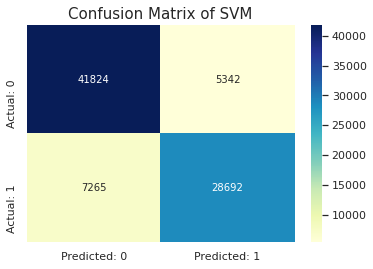

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     47166
           1       0.95      0.92      0.94     35957

    accuracy                           0.95     83123
   macro avg       0.95      0.94      0.95     83123
weighted avg       0.95      0.95      0.95     83123

Cross Validation Scores are:  [0.92455232 0.92699864 0.92892042]
Average F-1 score of Support Vector Machine Classifier is 0.93 


In [86]:
svm_clf = SVC(gamma="auto", random_state=42) #initiate the model 
svm_clf.fit(x_train_prepared , train_y) #fit the model 
y_predict_2 = svm_clf.predict(x_train_prepared) #predict
confusion_2 = confusion_matrix(train_y, y_predict_2) #create the confusion matrix
confusion_2 = pd.DataFrame(data=confusion_2, columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0 ','Actual: 1']) #transform it to dataframe
ax = plt.axes()
ax.set_title('Confusion Matrix of SVM')
sns.heatmap(confusion_1, annot=True, fmt ='d', cmap="YlGnBu", linecolor='w') #plot confusion matrix as heatmap
plt.show()
print('Classification report: \n',classification_report(train_y ,y_predict_2)) #classification report 
scores_2 = cross_val_score(svm_clf , x_train_prepared,  train_y, scoring="f1", cv=3) #cross validation scores 
print('Cross Validation Scores are: ',scores_2)
print("Average F-1 score of Support Vector Machine Classifier from Cross Validation is %0.2f " % (scores_2.mean())) 

The SVM performs a clear margin of separation between classes (Satisfied vs Unsatisfied) and unlike logistic regression, it doesn't output probabilities. Infact, SVM is more effective in high dimensional spaces thus, it has a good prediction power on the Airlines dataset whereby the F-1 score is around 93%. However, this algorithm is not suitable for large datasets and it doesn't perform well when the target classes are overlapping. The model can be improved further through random search for hyperparameters to reduce overfitting. 

## 5.3 Ridge Classifier 

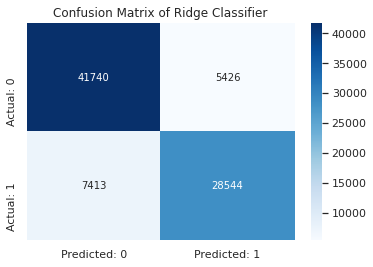

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87     47166
           1       0.84      0.79      0.82     35957

    accuracy                           0.85     83123
   macro avg       0.84      0.84      0.84     83123
weighted avg       0.85      0.85      0.84     83123

Cross Validation Scores are:  [0.81701472 0.81358406 0.81812715]
Average F-1 score of Ridge Classifier from Cross Validation is: 0.82


In [194]:
ridge_clf = RidgeClassifier() #initiate the model
ridge_clf.fit(x_train_prepared , train_y) #fit the model 
y_predict_3 = ridge_clf.predict(x_train_prepared) #predict
confusion_3 = confusion_matrix(train_y, y_predict_3) #create the confusion matrix
confusion_3 = pd.DataFrame(data=confusion_3, columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0 ','Actual: 1']) #transform it to dataframe
ax = plt.axes()
ax.set_title('Confusion Matrix of Ridge Classifier')
sns.heatmap(confusion_3, annot=True, fmt ='d', cmap="Blues", linecolor='w') #plot confusion matrix as heatmap
plt.show() 
print('Classification report: \n', classification_report(train_y ,y_predict_3)) #classification report 
scores_3 = cross_val_score(ridge_clf , x_train_prepared,  train_y, scoring="f1", cv=3) #cross validation scores 
print('Cross Validation Scores are: ', scores_3)
print("Average F-1 score of Ridge Classifier from Cross Validation is: %0.2f" % (scores_3.mean()));

The ridge classifier is a regularized model which improves the conditioning of the problem and reduces the variance of the estimates whereby it considers the highest value in prediction to accept target class. On the airlines dataset, the model has a F-1 score of 82%, this could be improved with an optimal choice of alpha (regularized hyperparameter).

## 5.4 DecisionTree Classifier 

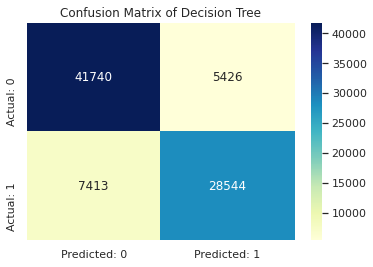

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     47166
           1       1.00      1.00      1.00     35957

    accuracy                           1.00     83123
   macro avg       1.00      1.00      1.00     83123
weighted avg       1.00      1.00      1.00     83123

Cross Validation Scores are:  [0.8446182  0.84302616 0.84761031]
Average F-1 score of Decision Tree Classifier from Cross Validation is 0.85


In [139]:
tree_clf = DecisionTreeClassifier(random_state=42) #initiate the model
tree_clf.fit(x_train_prepared , train_y)#fit the model 
y_predict_4 = tree_clf.predict(x_train_prepared) #predict
confusion_4 = confusion_matrix(train_y, y_predict_4) #create the confusion matrix
confusion_4 = pd.DataFrame(data=confusion_4, columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0 ','Actual: 1']) #transform it to dataframe
ax = plt.axes()
ax.set_title('Confusion Matrix of Decision Tree')
sns.heatmap(confusion_3, annot=True, fmt ='d', cmap="YlGnBu", linecolor='w') #plot confusion matrix as heatmap
plt.show() 
print('Classification report: \n', classification_report(train_y ,y_predict_4)) #classification report 
scores_4 = cross_val_score(tree_clf, x_train_prepared,  train_y, scoring="f1", cv=3) #cross validation scores 
print('Cross Validation Scores are: ',scores_4)
print("Average F-1 score of Decision Tree Classifier from Cross Validation is %0.2f" % (scores_4.mean()))  

The Decision Tree is good at classifying unknown records and excluding unimportant features. However, it can be easily overfitted and it is sensitive for any change of data. It has a good performance in predicting the satisfaction level on the airlines dataset, but we will try next the random forest which uses an advanced approach of training individual trees.

## 5.5 Random Forest Classifier 

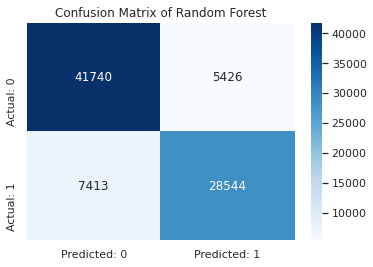

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     47166
           1       1.00      1.00      1.00     35957

    accuracy                           1.00     83123
   macro avg       1.00      1.00      1.00     83123
weighted avg       1.00      1.00      1.00     83123

Cross Validation Scores are:  [0.90206718 0.90136362 0.90432537]
Average F-1 score of Random Forest Classifier from Cross Validation is 0.90


In [140]:
rf_clf = RandomForestClassifier(random_state=42) #initiate the model
rf_clf.fit(x_train_prepared , train_y)#fit the model 
y_predict_5 = rf_clf.predict(x_train_prepared) #predict
confusion_5 = confusion_matrix(train_y, y_predict_5) #create the confusion matrix
confusion_5 = pd.DataFrame(data=confusion_3, columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0 ','Actual: 1']) #transform it to dataframe
ax = plt.axes()
ax.set_title('Confusion Matrix of Random Forest')
sns.heatmap(confusion_5, annot=True, fmt ='d', cmap="Blues", linecolor='w') #plot confusion matrix as heatmap
plt.show()  
print('Classification report: \n', classification_report(train_y ,y_predict_5)) #classification report 
scores_5 = cross_val_score(rf_clf, x_train_prepared,  train_y, scoring="f1", cv=3) #cross validation scores 
print('Cross Validation Scores are: ', scores_5)
print("Average F-1 score of Random Forest Classifier from Cross Validation is %0.2f" % (scores_5.mean()))

The Random Forest model consists of many decisions trees. It uses bagging and feature randomness when building each tree. It has the power to predict the class and identify the relative feature importance. In our example, this model has higher performance than decision trees and this can be increased further through random search to find the optimal parameters. 

## 5.6 Gradient Boosting Classifier 

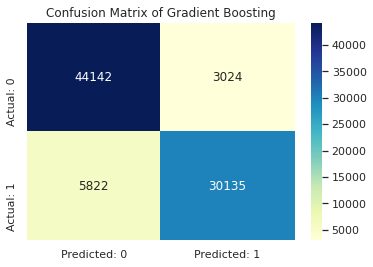

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     47166
           1       0.91      0.84      0.87     35957

    accuracy                           0.89     83123
   macro avg       0.90      0.89      0.89     83123
weighted avg       0.89      0.89      0.89     83123

Cross Validation Scores are:  [0.8691195  0.86644951 0.86871144]
Average F-1 score of Gradient Boosting Classifier from Cross Validation is 0.87


In [141]:
gb_clf = GradientBoostingClassifier(random_state=42) #initiate the model
gb_clf.fit(x_train_prepared , train_y) #fit the model
y_predict_6 = gb_clf.predict(x_train_prepared) #predict 
confusion_6 = confusion_matrix(train_y, y_predict_6) #create the confusion matrix
confusion_6 = pd.DataFrame(data=confusion_6, columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0 ','Actual: 1']) #transform it to dataframe
ax = plt.axes()
ax.set_title('Confusion Matrix of Gradient Boosting')
sns.heatmap(confusion_6, annot=True, fmt ='d', cmap="YlGnBu", linecolor='w') #plot confusion matrix as heatmap
plt.show() 
print('Classification report: \n', classification_report(train_y ,y_predict_6)) #classification report 
scores_6 = cross_val_score(gb_clf, x_train_prepared,  train_y, scoring="f1", cv=3) #cross validation scores 
print('Cross Validation Scores are: ', scores_6)
print("Average F-1 score of Gradient Boosting Classifier from Cross Validation is %0.2f" % (scores_6.mean()))

The GradientBoosting Classifier is an algorithim which adds predictors to an ensemble, each one
correcting its predecessor. It has a special learning_rate hyperparameter which scales the contribution of each tree and controls overfitting. Also, early stopping can be implemented to monitor generalization and stops when the error begins to degrade. The model has achieved a good F-1 score of 87% on the Airlines dataset.

## 5.7 K-nearest Neighbors Classifier

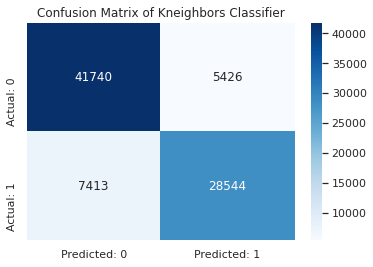

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     47166
           1       0.96      0.91      0.93     35957

    accuracy                           0.94     83123
   macro avg       0.94      0.94      0.94     83123
weighted avg       0.94      0.94      0.94     83123

Cross Validation Scores are:  [0.89700568 0.90039155 0.90163371]
Average F-1 score of Kneighbors Classifier from Cross Validation is 0.90


In [142]:
kne_classifier = KNeighborsClassifier() #initiate the model
kne_classifier.fit(x_train_prepared , train_y) #fit the model
y_predict_7 = kne_classifier.predict(x_train_prepared) #predict 
confusion_7 = confusion_matrix(train_y, y_predict_7) #create the confusion matrix
confusion_7 = pd.DataFrame(data=confusion_7, columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0 ','Actual: 1']) #transform it to dataframe
ax = plt.axes()
ax.set_title('Confusion Matrix of Kneighbors Classifier')
sns.heatmap(confusion_5, annot=True, fmt ='d', cmap="Blues", linecolor='w') #plot confusion matrix as heatmap
plt.show()  
print('Classification report: \n', classification_report(train_y ,y_predict_7)) #classification report 
scores_7 = cross_val_score(kne_classifier, x_train_prepared,  train_y, scoring="f1", cv=3) #cross validation scores 
print('Cross Validation Scores are: ', scores_7)
print("Average F-1 score of Kneighbors Classifier from Cross Validation is %0.2f" % (scores_7.mean()))

K-neighbors is a classification model which classifies datapoints into separate clusters. Its limitation is that it gets slower as the data increases. It has a very good performance of F-1 score 90% on the Airlines dataset and it can be improved through finding the optimal number of clusters (k). 

## 5.8 Shortlisted Models

In [77]:
#create a dataframe for the avg f-1 scores of models
Models = ['SVM', 'K-neighbors', 'RandomForest', 'GradBoost', 'DecisionTree', 'Ridge', 'LogReg'] #define list of models 
Average_F1_CrossVal = [93, 90, 90, 87, 85, 82, 82] #define list of F-1 scores
models_df = pd.DataFrame({'Average_F1_CrossVal': Average_F1_CrossVal}, index=Models) #build the dataframe 
models_df

,Average_F1_CrossVal
SVM,93
K-neighbors,90
RandomForest,90
GradBoost,87
DecisionTree,85
Ridge,82
LogReg,82


<Figure size 720x576 with 0 Axes>

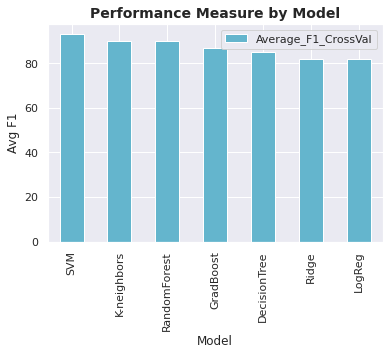

In [76]:
#visualize these scores in bar plot
plt.figure(figsize=(10,8)) #figure size 
ax = models_df.plot.bar(color ='c')
ax.set_title('Performance Measure by Model', fontweight="bold", size =14) #set the title
ax.set_xlabel('Model', fontsize = 12) #set x_label
ax.set_ylabel('Avg F1', fontsize = 12); #set y_label

The best four models with the highest F-1 score from Cross-alidation will be shortlised for fine-tuning:

1- Support Vector Machine : 93


2- K-nearest neighbors: 90


3- Random Forest: 90


4- Gradient Boosting : 87


# 6. Fine Tuning 

We will be using the random search to tune the four selected models because our dataset is large. This search will enable us to set-up a grid of parameter values and find combinations to train the model and achieve better performance. After obtaining the optimal parameters of RandomForest and GradientBoosting algorithims specifically, the relative importance of features will be extracted to identify which variables are mostly affecting the predictor. Then, we will apply an ensemble method of a voting classifier to combine the predictions of the tuned estimators built in the four algorithims and obtain a better predictor so we can cross-check the models' perfromance on testset. If the voting ensemble won't work, we will try the Adaboost method. Lastly, we will select the final model and predict on the testset to measure the model's generalizability power.

## 6.1 Random Search

In [25]:
# Use the random search for best hyperparameters of SVC
#initiate the model 
model = SVC() 
#define the hyperparameters 
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define search
search_1 = dict(kernel=kernel,C=C,gamma=gamma)
# set up the SVC_random 
random_search_1 = RandomizedSearchCV(estimator = model, param_distributions = search_1, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
SVC.random_result = random_search_1.fit(x_train_prepared , train_y)
# summarize results
print("Best: %f using %s" % (SVC.random_result.best_score_, SVC.random_result.best_params_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed: 37.7min remaining: 10.8min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 41.4min finished


Best: 0.910037 using {'kernel': 'poly', 'gamma': 'scale', 'C': 50}


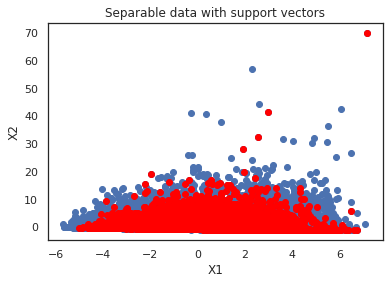

In [305]:
svm_clf = SVC(gamma="scale", kernel = 'poly', C = 50, random_state=42) #SVM best parameters model
svm_clf.fit(x_train_prepared , train_y) #fit the model  
support_vectors = svm_clf.support_vectors_ # Get support vectors 
# Visualize support vectors
plt.scatter(x_train_prepared[:,0], x_train_prepared[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
#extracted from https://www.machinecurve.com/index.php/2020/05/05/how-to-visualize-support-vectors-of-your-svm-classifier/

Despite the SVM's computational complexity, we were able to find the best hyperparameters and visualized the data separation. The graph shows that the data is non-linear especially that the best kernel is obtained as "polynomial". It is also difficult to generate a clear decision boundary among the two classes (red and blue) as reflected in the figure. 

In [20]:
#use random searching key for hyperparametres of KNeighborsClassifier
# define model
model = KNeighborsClassifier()
#define parameters 
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
#define search
search_3 = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
#set up the search model
random_search_3 = RandomizedSearchCV(estimator=model, param_distributions=search_3, n_jobs=-1, cv=3, scoring='f1',error_score=0)
#fit the search
random_result_Knei = random_search_3.fit(x_train_prepared , train_y)
#summarize results
print("Best: %f using %s" % (random_result_Knei.best_score_,random_result_Knei.best_params_))

Best: 0.903675 using {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}


In [31]:
# use random search for RandomForestClassifier
#define the model
rnd_clf = RandomForestClassifier(random_state=42)
#define parameters 
search_4 = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8], 'bootstrap': [False, True], 'max_depth': [2, 3, 4,8] }]
#set up the search search 
random_search_4 = RandomizedSearchCV(rnd_clf , search_4, cv=3,
                           scoring='f1', return_train_score=True)
#fit the search
random_result_RF = random_search_4.fit(x_train_prepared , train_y)
#summarize results
print("Best: %f using %s" % (random_result_RF.best_score_,random_result_RF.best_params_))
#extracted from: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Best: 0.840864 using {'n_estimators': 30, 'max_features': 2, 'max_depth': 8, 'bootstrap': True}


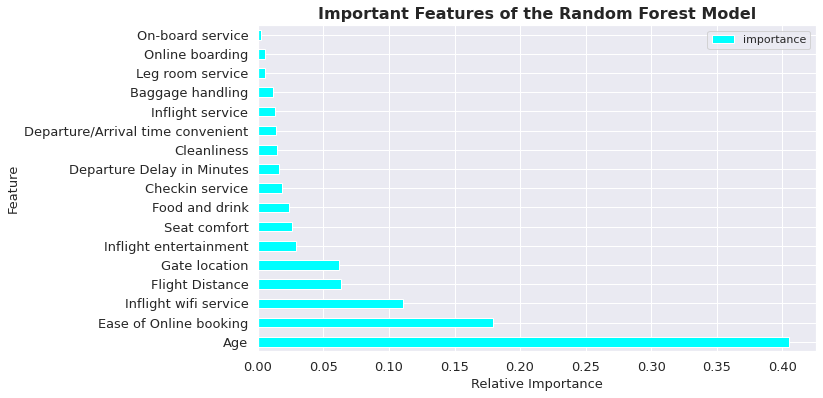

In [88]:
#extract the important features from the new random forest model
new_rf_clf = RandomForestClassifier(n_estimators = 30, max_features = 4, max_depth = 8, bootstrap = True) #Random Classifier best parameters models 
new_rf_clf.fit(x_train_prepared , train_y) #fit the model
feature_importances = new_rf_clf.feature_importances_ #find the feature importance 
attributes = numeric_variables + categorical_variables #define the attributes 
feat_importances = sorted(zip(feature_importances, attributes), reverse=True) #create a sorted tuple 
#visualise the feature importance of Random Forest
df_rf = pd.DataFrame(data = feat_importances) #create a dataframe 
df_rf.columns = ['importance', 'feature'] #rename the columns
df_rf.set_index('feature', inplace=True)#set the index to be the features 
fig, ax = plt.subplots(figsize=(10,6))
df_rf.plot(ax=ax, kind='barh', color ='aqua') #define the plot 
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_title('Important Features of the Random Forest Model', fontweight="bold", size =16) #set title 
ax.set_xlabel('Relative Importance', fontsize = 13)
ax.set_ylabel('Feature', fontsize = 13);

The **best 4 features from RandomForest** are:
 
1- Age 

2- Ease of Online Booking

3- Wifi Service 

4- Gate Location

In [77]:
#use the results of the best parameters of Random Forest to find the best learning rate of Gradient Boosting 
#define learning rate list 
lr_list = [0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    #set up the GB classifier to find learning rate with early stopping (warm_start = True)
    new_gb_clf = GradientBoostingClassifier(n_estimators=30, warm_start=True, learning_rate=learning_rate, max_features=4, random_state=42)
    #fit the model
    new_gb_clf.fit(x_train_prepared , train_y) 
    #summarize the results
    print("Learning rate: ", learning_rate)
    print("score (training): {0:.3f}".format(new_gb_clf.score(x_train_prepared , train_y)))
#extracted from: https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

Learning rate:  0.1
score (training): 0.867
Learning rate:  0.25
score (training): 0.885
Learning rate:  0.5
score (training): 0.895
Learning rate:  0.75
score (training): 0.898
Learning rate:  1
score (training): 0.897


The best score is at learning rate of 0.75 

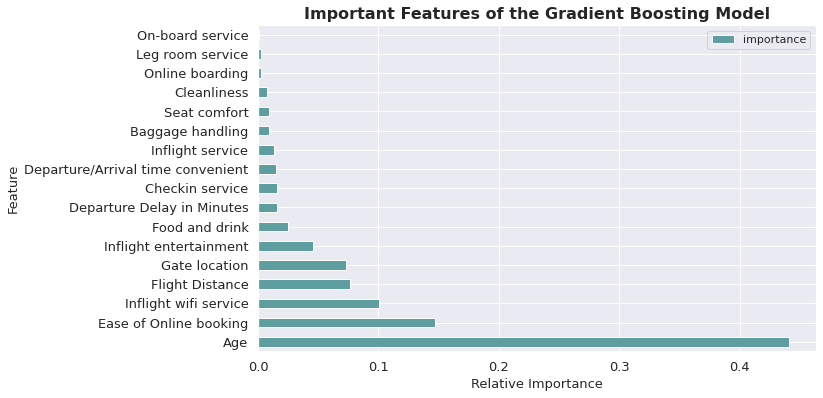

In [89]:
#get the important features of Grad Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=30, warm_start=True, learning_rate=0.75, max_features=4, random_state=42) #Grad Boosting best parameters models
gb_clf.fit(x_train_prepared , train_y) 
feature_importances_1 = gb_clf.feature_importances_ #find the feature importance
attributes = numeric_variables + categorical_variables #define the attributes 
feat_importances_1 = sorted(zip(feature_importances_1, attributes), reverse=True) #create a sorted tuple
feat_importances_1;
#visualise the feature importance of Gradient Boosting Classifier
df_gb = pd.DataFrame(data = feat_importances_1) #create a dataframe 
df_gb.columns = ['importance', 'feature'] #rename the columns
df_gb.set_index('feature', inplace=True) #set the index to be the features 
fig, ax = plt.subplots(figsize=(10,6))
df_gb.plot(ax=ax, kind='barh', color ='cadetblue') #define the plot 
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_title('Important Features of the Gradient Boosting Model', fontweight="bold", size =16) #set title 
ax.set_xlabel('Relative Importance', fontsize = 13)
ax.set_ylabel('Feature', fontsize = 13);

The **best 4 features from GradientBoosting** are:
 
1- Age 

2- Ease of Online Booking

3- Wifi Service 

4- Flight Distance 

## 6.2 Ensemble Method: Voting Classifier

In [80]:
#set up an ensemble model using the best predictors (models with best parameters)
svm_clf = SVC(gamma="scale", kernel = 'poly', C = 50, random_state=42) #SVM best parameters model
kn_classifier = KNeighborsClassifier(weights = 'uniform', n_neighbors = 7, metric = 'manhattan') #Kneighbors classifier best parameters model 
rf_clf = RandomForestClassifier(n_estimators = 30, max_features = 4, max_depth = 8, bootstrap = True) #Random Classifier best parameters models 
gb_clf = GradientBoostingClassifier(n_estimators=30, warm_start=True, learning_rate=0.75, max_features=4, random_state=42) #Grad Boosting best parameters models
#set up the voting classifier
voting_clf = VotingClassifier(
estimators=[('sv', svm_clf), ('kn', kn_classifier),('rf', rf_clf),('gb', gb_clf) ],
voting='hard')
voting_clf

VotingClassifier(estimators=[('sv', SVC(C=50, kernel='poly', random_state=42)),
                             ('kn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=7)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=4,
                                                     n_estimators=30)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.75,
                                                         max_features=4,
                                                         n_estimators=30,
                                                         random_state=42,
                                                         warm_start=True))])

In [82]:
#summarize the results of each predictor
for clf in (svm_clf, kn_classifier, rf_clf, gb_clf ,voting_clf):
    clf.fit(x_train_prepared, train_y) #fit on the train set
    y_predict = clf.predict(x_test_prepared) #predict on the test set 
    print(clf.__class__.__name__, round(f1_score(y_predict, test_y),2)) #print out the f-1 score of each model
#extracted from: https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb

SVC 0.57
KNeighborsClassifier 0.71
RandomForestClassifier 0.62
GradientBoostingClassifier 0.66
VotingClassifier 0.64


The voting classifier doesn't perform well because we don't have a good number of weak learners and they are not sufficiently diverse. We will try another ensemble. 

## 6.3 Another Ensemble: Adaboost 

In [84]:
# use random search for AdaboostClassifier
#define the model
adaboost_clf = AdaBoostClassifier(random_state=42)
#define parameters 
search_5= [
    {'n_estimators': [3, 10, 15, 30], 'learning_rate': [0.1, 0.25, 0.5, 0.75, 1]}]
  
#set up the search search 
random_search_5 = RandomizedSearchCV(adaboost_clf  , search_5, cv=3,
                           scoring='f1', return_train_score=True)
#fit the search
random_result_Adab = random_search_5.fit(x_train_prepared , train_y)
#summarize results
print("Best: %f using %s" % (random_result_Adab.best_score_,random_result_Adab .best_params_))

Best: 0.809903 using {'n_estimators': 15, 'learning_rate': 0.75}


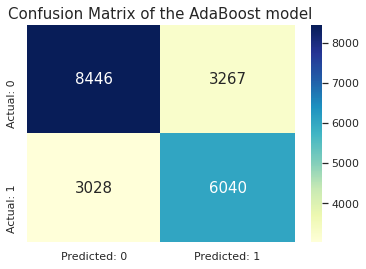

Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73     11713
           1       0.65      0.67      0.66      9068

    accuracy                           0.70     20781
   macro avg       0.69      0.69      0.69     20781
weighted avg       0.70      0.70      0.70     20781

Cross Validation Scores are:  [0.80626632 0.82206284 0.82432892]
Average F-1 score of AdaBoosting Classifier is 0.82 


In [34]:
#Try to fit the model and predict on the testset 
adaboost_clf = AdaBoostClassifier(n_estimators= 15, learning_rate = 0.75,  random_state=42)
adaboost_model = adaboost_clf.fit(x_train_prepared, train_y) #fit on the train set
y_test_predict = adaboost_clf.predict(x_test_prepared) #predict on the test set 
confusion_test = confusion_matrix(test_y, y_test_predict) #create the confusion matrix
confusion_test = pd.DataFrame(data=confusion_test, columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0 ','Actual: 1']) #transform it to dataframe
ax = plt.axes()
ax.set_title('Confusion Matrix of the AdaBoost model')
sns.heatmap(confusion_test, annot=True, fmt ='d', cmap="YlGnBu", linecolor='w') #plot confusion matrix as heatmap
plt.show()
print('Classification report: \n',classification_report(test_y, y_test_predict)) #classification report 
scores_test= cross_val_score(adaboost_model, x_test_prepared, test_y, scoring="f1", cv=3) #cross validation scores 
print('Cross Validation Scores are: ',scores_test)
print("Average F-1 score of AdaBoosting Classifier is %0.2f " % (scores_test.mean()));

## 6.4 Final Model

| Tuned Model (best parameters) | Performance on Trainset | Performance on Testset |
| :-: | :-: | :-: |
| SVMClassifier | 0.91 | 0.57
| KNeighborsClassifier | 0.90 | 0.71
| RandomForestClassifier| 0.86 | 0.62
| GradientBoostingClassifier| 0.90 | 0.66
| VotingClassifier | - | 0.64
| AdaBoostClassifier | 0.81 | 0.82

If we compare the performance measure (F-1 score) of each of the models, we find that the SVM, Kneighbors, RF, and GB are somehow overfitted whereby they perform well on the train but less on the test. However, Adaboost algorithim is performing well on both datasets which indicates high generalizability power. Therefore, **Adaboost will be considered as our final proposed model**. 

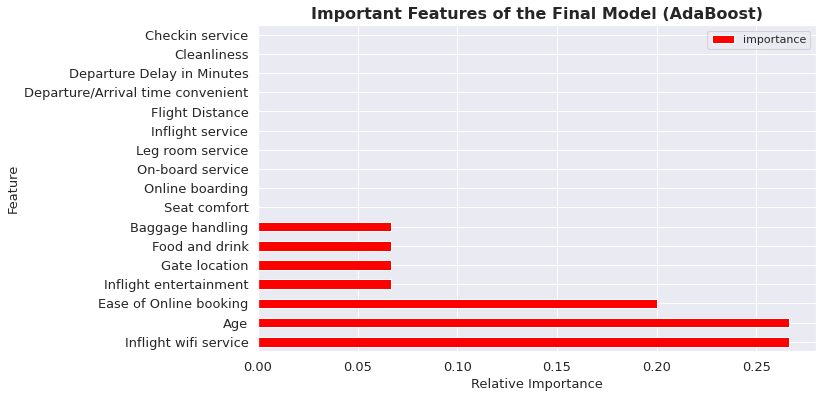

In [90]:
#extract the important features from the final model 
feature_importances_3 = final_model.feature_importances_
attributes = numeric_variables + categorical_variables #define the attributes 
feat_importances_3 = sorted(zip(feature_importances_3, attributes), reverse=True) #create a sorted tuple 
feat_importances_3 #print out the results
#taken from: https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb
#visualise the feature importance of Ada Boosting Classifier
df_2 = pd.DataFrame(data = feat_importances_3) #create a dataframe 
df_2.columns = ['importance', 'feature'] #rename the columns
df_2.set_index('feature', inplace=True) #set the index to be the features 
fig, ax = plt.subplots(figsize=(10,6))
df_2.plot(ax=ax, kind='barh', color ='red') #define the plot 
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_title('Important Features of the Final Model (AdaBoost)', fontweight="bold", size =16) #set title 
ax.set_xlabel('Relative Importance', fontsize = 13)
ax.set_ylabel('Feature', fontsize = 13);

The **best 4 features from Adaboost** are:

1- Wifi

2- Age

3- Online Booking 

4- Entertaiment 

# 7. Conclusion 


![conclusion](https://user-images.githubusercontent.com/73695418/110212641-4dc5cb80-7e94-11eb-9c23-d51a3815fa1f.png)

Inflight Entertaiment, Age, Online Booking, and Wifi are the strongest features which determine customer's satisfaction. Our predictive system will be able to classify customers and support Airlines to continuosly monitor and assess their performance on the eyes of customers and improve accordingly. 

# 8. Reccomendations 

Based on the report's findings, we propose the below: 


1- **Designing personalized packages for customers based on age categories** particularly targeting adults and old people who are the least satisfied. 


2- **Surveying eco-customers** to identify their preferences and provide tailored services accordingly


3- **Improving the inflight wifi access and entertaiment**. For example, streaming Netflix or Spotify will give customers diverse and new-released options of music and films


4- **Implementing online booking assistance service** for customers navigating website and social media platforms 


# 9. Limitations and Future Work 

1- The report needs machine learning literature to identify proper algorithims that can fit our dataset and objective. 

2- Fine tuning can be extended further; however, due to the time constraints, computational power and complexity, we weren't able to optimize all the scratched models and conduct grid search. 

3- To have stronger predictive system, we should consider other hidden factors which affect customer's satisfaction such as seasonality, price flactuations, aircrew service. Also, qualitative data can be taken from open-ended customers' responses and studied through NLP such as sentiment analysis.


# 10. References 

1- 2021. [online] Available at: <https://www.pwc.com/us/en/industries/transportation-logistics/tailwinds-airline-industry-trends.html> [Accessed 5 March 2021].

2- MachineCurve. 2021. How to visualize support vectors of your SVM classifier? – MachineCurve. [online] Available at: <https://www.machinecurve.com/index.php/2020/05/05/how-to-visualize-support-vectors-of-your-svm-classifier/> [Accessed 5 March 2021].

3- Stack Abuse. 2021. Gradient Boosting Classifiers in Python with Scikit-Learn. [online] Available at: <https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/> [Accessed 5 March 2021].

4- GitHub. 2021. ageron/handson-ml. [online] Available at: <https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb> [Accessed 5 March 2021].

5- Medium. 2021. Hyperparameter Tuning the Random Forest in Python. [online] Available at: <https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74> [Accessed 5 March 2021].

6- GitHub. 2021. ageron/handson-ml. [online] Available at: <https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb> [Accessed 5 March 2021].

7- Kaggle.com. 2021. Airlines Customer satisfaction. [online] Available at: <https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction> [Accessed 6 March 2021].